In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/CV/Data_YOLO

/content/drive/.shortcut-targets-by-id/1wu7ijWhY1_HJddIenGyM7F6fvOStsSds/CV/Data_YOLO


In [3]:
import os
import matplotlib.pyplot as plt

In [4]:
print('Train: {}'.format(len(os.listdir('train/images'))))
print('Val: {}'.format(len(os.listdir('valid/images'))))
print('Test: {}'.format(len(os.listdir('test/images'))))

Train: 5715
Val: 1656
Test: 820


In [5]:
print('Train: {}'.format(len(os.listdir('train/labels'))))
print('Val: {}'.format(len(os.listdir('valid/labels'))))
print('Test: {}'.format(len(os.listdir('test/labels'))))

Train: 3405
Val: 1656
Test: 820


In [ ]:
def thong_ke(path):
    count = 0
    stop = 0
    go = 0
    warning = 0
    for i in os.listdir(path):
        if i.endswith('.txt'):
            count += 1
            f = open(path + '/' + i, "r")
            content = f.read()
            lst = content.split('\n')
            for i in lst:
                temp = i.split()
                if len(temp) == 0:
                    continue
                if temp[0] == '0':
                    go += 1
                elif temp[0] == '1':
                    warning += 1
                elif temp[0] == '2':
                    stop += 1
            f.close()

    print('Number of image: ', count)
    return go,stop,warning

In [ ]:
go_train,stop_train,warning_train = thong_ke('train/labels') 

print(f'Go : {go_train}')
print(f'Stop : {stop_train}')
print(f'Warning : {warning_train}')

Number of image:  5715
Go : 8295
Stop : 9710


In [ ]:
go_test,stop_test,warning_test = thong_ke('test/labels') 

print(f'Go : {go_test}')
print(f'Stop : {stop_test}')
print(f'Warning : {warning_test}')

Number of image:  820
Go : 1236
Stop : 1409


In [ ]:
go_valid,stop_valid,warning_valid = thong_ke('valid/labels') 

print(f'Go : {go_valid}')
print(f'Stop : {stop_valid}')
print(f'Warning : {warning_valid}')

Number of image:  1656
Go : 2381
Stop : 2833


In [ ]:
c = ['green', 'red', 'yellow']

In [ ]:
go = go_train + go_test + go_valid
stop = stop_train + stop_test + stop_valid
warning = warning_train + warning_test + warning_valid

In [ ]:
print(f'Go : {go}')
print(f'Stop : {stop}')
print(f'Warning : {warning}')

Go : 11912
Stop : 13952


In [ ]:
dictt = {'Go': go, 'Stop': stop, 'Warning': warning}

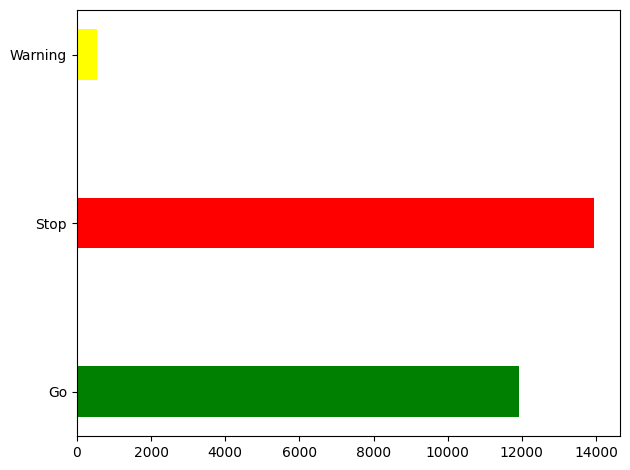

In [ ]:
plt.barh(list(dictt.keys()), dictt.values(), height=0.3,color=c)
plt.tight_layout()
plt.show()